# Question 1:
**Le groupe est composé d'Eliot, Cécilia (A COMPLETER)**

# Question 2:
**On a choisi le dataset apple_quality**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./apple_quality.csv')
df = df.drop(columns = "A_id")


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
df['Quality'] = df['Quality'].map({'good' : 1, 'bad' : 0})

In [4]:
df.dropna(inplace = True)

In [5]:
df['Quality'] = df['Quality'].astype(int)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


# Question 3:

**Les variables les plus importantes afin de prédire la qualité de la pomme serait probablement "Ripeness", "Sweetness" et "Acidity"**

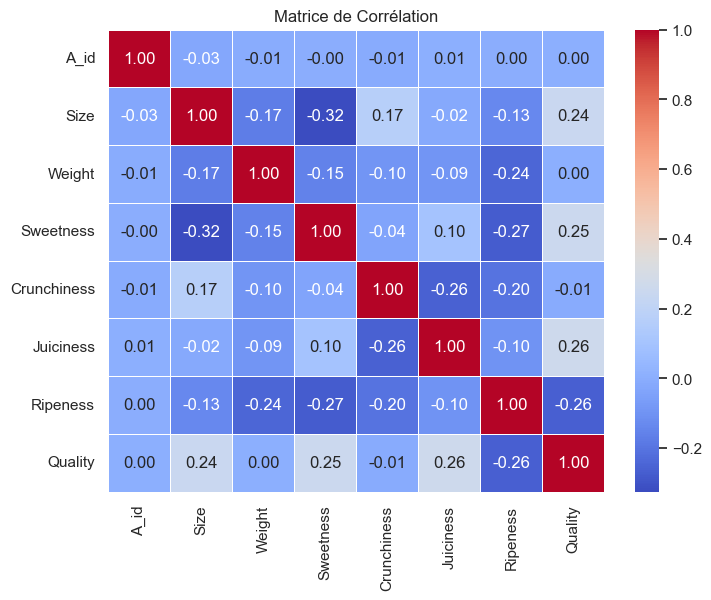

In [6]:
corr_matrix = df.corr()
sns.set(style='white') 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

# Question 4

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns = 'Quality')
y = df['Quality']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 30)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
coefficients = model.coef_
coefficients

array([ 4.60143495e-06,  1.10406825e-01,  4.60764147e-02,  9.89016697e-02,
        6.80684655e-03,  7.61212358e-02, -2.15088443e-02, -5.18444989e-02])

In [54]:
for i in range(8):
    print(X.columns[i],coefficients[i])

A_id 4.601434951507627e-06
Size 0.11040682461460366
Weight 0.04607641470154038
Sweetness 0.0989016697077648
Crunchiness 0.006806846550470636
Juiciness 0.07612123577437722
Ripeness -0.021508844317100616
Acidity -0.0518444989392471


**Il semblerait que la caractéristique la plus importante est la taille (Size) contrairement à ce que l'on pensait, l'acidité et la douceur influent également mais de facon moins importante que la taille.**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)
predictions = random_forest_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {accuracy}")

Précision du modèle : 0.8675


In [13]:
!pip install shap

     -------------------------------------- 450.3/450.3 kB 4.7 MB/s eta 0:00:00


In [29]:
np.array(x_test.iloc[0].tolist())

array(['1065.0', '-3.193771996', '2.130105726', '-0.247501191',
       '-2.620954157', '4.226314433', '4.59034704', '1.529106684'],
      dtype='<U32')

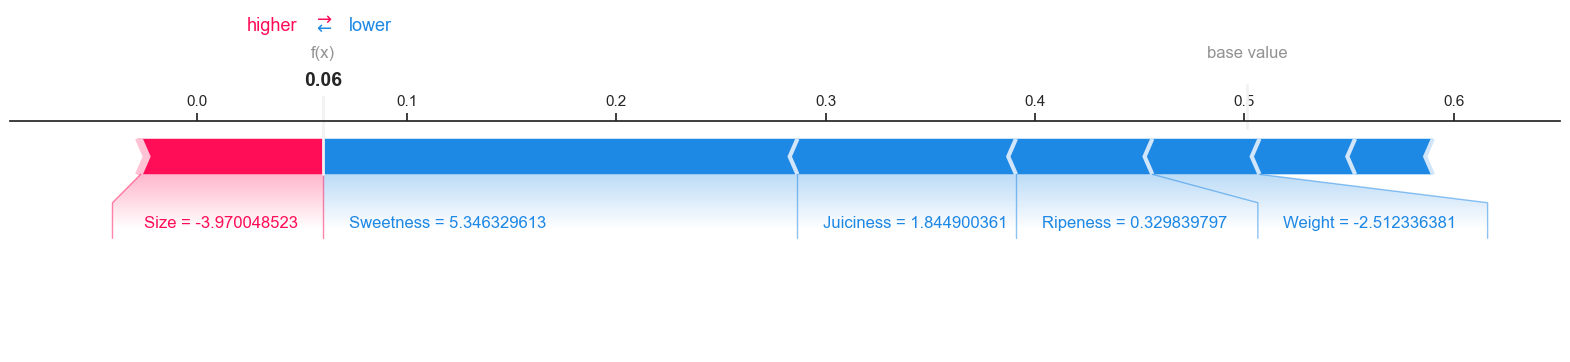

In [51]:
import shap

explainer = shap.TreeExplainer(random_forest_model)


observation = X.iloc[0]
shap_values = explainer.shap_values(observation)
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=X.columns)


shap.plots.force(explainer.expected_value[0], shap_values[0], features=observation,matplotlib=True)



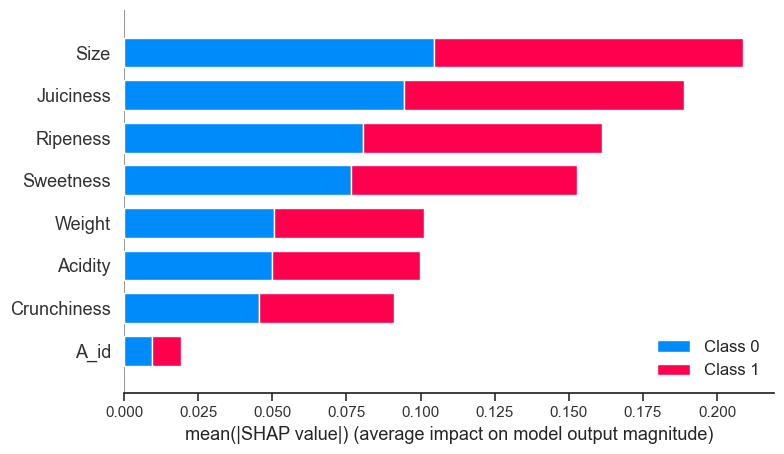

In [56]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Nous constatons la même chose que pour la régression linéaire.

In [75]:
X1 = X.to_numpy()
X1

array([[0.0, -3.970048523, -2.512336381, ..., 1.844900361, 0.329839797,
        '-0.491590483'],
       [1.0, -1.195217191, -2.839256528, ..., 0.853285795, 0.867530082,
        '-0.722809367'],
       [2.0, -0.292023862, -1.351281995, ..., 2.838635512, -0.038033328,
        '2.621636473'],
       ...,
       [3997.0, -2.634515299, -2.13824672, ..., 2.19970859, 4.763859177,
        '-1.334611391'],
       [3998.0, -4.008003744, -1.779337107, ..., 2.161435121,
        0.214488384, '-2.229719806'],
       [3999.0, 0.27853965, -1.715505028, ..., 1.2666774, -0.77657147,
        '1.599796456']], dtype=object)

ExactExplainer explainer: 4001it [20:30,  3.24it/s]                          


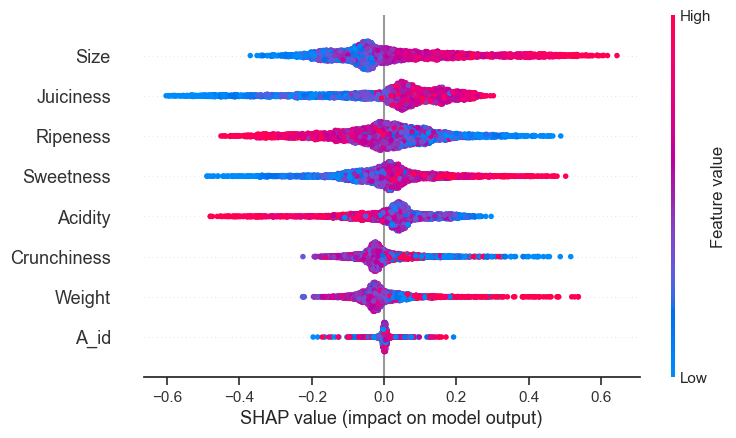

In [94]:
X["Acidity"] = X["Acidity"].astype(float)

explainer = shap.Explainer(random_forest_model.predict,X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

In [97]:
shap.dependence_plot(0, shap_values[0], X)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [89]:
X["Acidity"].isnull().any()

False

In [93]:
X.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
dtype: object